In [1]:
# A Convolutional  Neural Network (CNN) is a type of artificial neural network used in
# image recognition and processing that is specifically designed to process pixel data

# A CNN typically has three layers: a convolutional layer, a pooling layer and a fully connected layer
# Convolutional Layer: It is the core building block of the CNN. This layer performs the dot product.
# between two matrices, where one matrix is the set of input matrix and other matrix is kernel.

# Pooling Layer: It is responsible for reducing the spatial size of convolved feature

# CNN Model on MNIST Dataset for written digit classification

In [2]:
# MNIST Dataset: It is the handwritten numbers taken as inputs
# All images are grey scale

In [5]:
from keras.datasets import mnist
from tensorflow.keras.utils import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Load the data

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [7]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
# Understand the image format

X_train[0].shape

(28, 28)

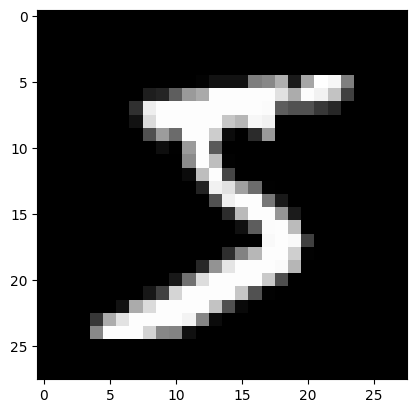

In [9]:
plt.imshow(X_train[0], cmap='gray')

In [10]:
Y_train[0]

5

In [12]:
# Preprocess the image data

image_height, image_width = 28, 28

In [13]:
X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [14]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [15]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [16]:
X_train/=255.0
X_test/=255.0

print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [17]:
print(Y_train.shape)
print(Y_test.shape)

(60000,)
(10000,)


In [19]:
# Converting the target value into 10 bins. So we will see that output from a model will
# go into one of these bins

Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

print(Y_train.shape)
print(Y_test.shape)

(60000, 10)
(10000, 10)


In [20]:
# Building the model

model = Sequential()

model.add(Dense(512, activation='relu', input_shape = (784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [22]:
# Compile the model

model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Total number of nodes * total number of weights + Total number of biases

784*512 + 512 # For first layer

401920

In [24]:
512*512 + 512 # for second layer

262656

In [25]:
512*10 + 10 # For last layer

5130

In [26]:
# Train the model

history = model.fit(X_train, Y_train, epochs = 20, validation_data = (X_test, Y_test))

Epoch 1/20
1875/1875 [==============================] - 25s 12ms/step - loss: 0.1821 - accuracy: 0.9444 - val_loss: 0.1076 - val_accuracy: 0.9660
Epoch 2/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0816 - accuracy: 0.9749 - val_loss: 0.0756 - val_accuracy: 0.9767
Epoch 3/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0562 - accuracy: 0.9819 - val_loss: 0.0850 - val_accuracy: 0.9757
Epoch 4/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0420 - accuracy: 0.9863 - val_loss: 0.0763 - val_accuracy: 0.9786
Epoch 5/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0331 - accuracy: 0.9898 - val_loss: 0.0897 - val_accuracy: 0.9771
Epoch 6/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0305 - accuracy: 0.9903 - val_loss: 0.0714 - val_accuracy: 0.9822
Epoch 7/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0237 - accuracy: 0.9924 - val_loss: 0.0910 -

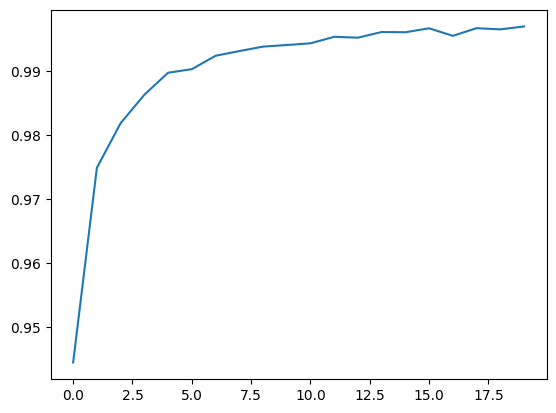

In [27]:
plt.plot(history.history['accuracy'])

In [28]:
# Evaluating the model

score = model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.1337 - accuracy: 0.9814
